# Analysis of the Project CSV Data

## Load Data from CSV and Initialize

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns

projects = pd.read_csv('result/ProjectSample.csv')

# Drop data with < 100 of code, and no commits
projects = projects[projects['commits'] > 0]
projects = projects[projects['lines_of_code'] > 100]

projects['comment_density'] = projects['lines_of_comments'] / projects['lines_of_code']

sns.set(style='white')

projects.describe()

,size,stars,watchers,forks,commits,authors,lines_of_code,lines_of_comments,lines_blank,src_files,header_comment,functions,func_with_doc,doc_comment,impl_comment,comment_density
count,4.810000e+02,481.000000,481.000000,481.000000,481.000000,481.000000,4.810000e+02,481.000000,481.000000,481.000000,481.0,481.000000,481.0,481.000000,481.000000,481.000000
mean,4.958083e+04,557.349272,557.349272,129.133056,2863.336798,80.288981,4.659777e+04,13495.900208,8787.332640,5.174636,-1.0,79.721414,-1.0,17.114345,46.904366,0.286907
std,1.705956e+05,3580.932130,3580.932130,955.231248,6037.502755,160.074220,1.814355e+05,57869.789859,33148.270332,55.595026,0.0,784.296963,0.0,205.373363,478.676373,0.309530
min,6.700000e+01,0.000000,0.000000,0.000000,504.000000,1.000000,1.090000e+02,0.000000,0.000000,-1.000000,-1.0,-1.000000,-1.0,-1.000000,-1.000000,0.000000
25%,2.945000e+03,0.000000,0.000000,0.000000,747.000000,11.000000,4.089000e+03,509.000000,705.000000,-1.000000,-1.0,-1.000000,-1.0,-1.000000,-1.000000,0.096761
50%,1.046500e+04,5.000000,5.000000,3.000000,1268.000000,31.000000,9.714000e+03,1952.000000,2110.000000,-1.000000,-1.0,-1.000000,-1.0,-1.000000,-1.000000,0.209646
75%,4.289900e+04,77.000000,77.000000,33.000000,2498.000000,74.000000,2.948000e+04,7039.000000,5851.000000,-1.000000,-1.0,-1.000000,-1.0,-1.000000,-1.000000,0.359343
max,3.082802e+06,51887.000000,51887.000000,18306.000000,82039.000000,1406.000000,2.685395e+06,956988.000000,486780.000000,909.000000,-1.0,14500.000000,-1.0,3898.000000,8839.000000,2.553448


## Comment Density Analysis

Overall Correlation:  0.8138092398122038
Correlation in JavaScript: 0.7744516058186998
Correlation in Java: 0.8284383999691346
Correlation in Python: 0.8724287436378187


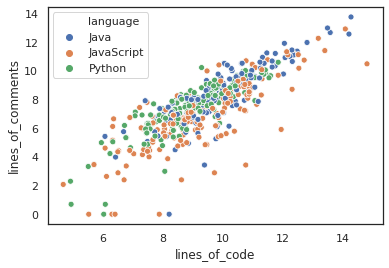

In [45]:
def analyze_correlation(x, y, types):
    type_set = set(types)
    print('Overall Correlation: ', np.corrcoef(x, y)[0][1])
    for t in type_set:
        x1 = [val for idx, val in x.items() if types[idx] == t]
        y1 = [val for idx, val in y.items() if types[idx] == t]
        print('Correlation in {}:'.format(t), np.corrcoef(x1, y1)[0][1])
    sns.scatterplot(x, y, hue=types)
    
analyze_correlation(x=np.log1p(projects['lines_of_code']), y=np.log1p(projects['lines_of_comments']), types=projects['language'])

Overall Correlation:  -0.011928220817275749
Correlation in JavaScript: -0.10248814214030941
Correlation in Java: -0.04843691486554548
Correlation in Python: 0.155518785554279


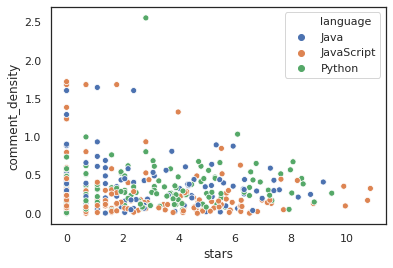

In [46]:
analyze_correlation(x=np.log1p(projects['stars']), y=projects['comment_density'], types=projects['language'])

Overall Correlation:  0.02367138953206393
Correlation in JavaScript: -0.05014079591768125
Correlation in Java: 0.0804842499758362
Correlation in Python: 0.029612394511137688


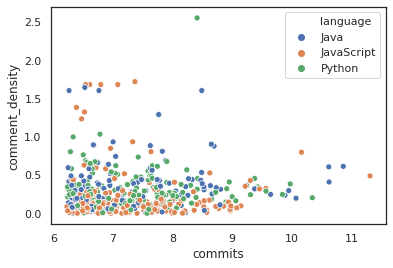

In [47]:
analyze_correlation(x=np.log1p(projects['commits']), y=projects['comment_density'], types=projects['language'])

Overall Correlation:  0.11448545425008266
Correlation in JavaScript: 0.09280305399712313
Correlation in Java: 0.05001025361761667
Correlation in Python: 0.20769797750158217


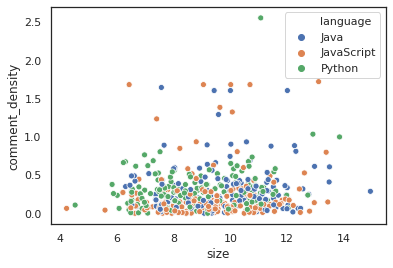

In [48]:
analyze_correlation(x=np.log1p(projects['size']), y=projects['comment_density'], types=projects['language'])

Overall Correlation:  -0.004289166207779255
Correlation in JavaScript: -0.03155423347752686
Correlation in Java: 0.016535917579932405
Correlation in Python: 0.009590808047156736


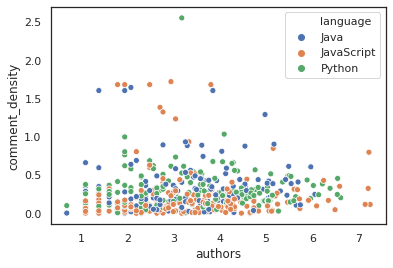

In [49]:
analyze_correlation(x=np.log1p(projects['authors']), y=projects['comment_density'], types=projects['language'])

Overall Correlation:  -0.0017561451308258761
Correlation in JavaScript: -0.08233251739640046
Correlation in Java: -0.04511649156999022
Correlation in Python: 0.15293395758023384


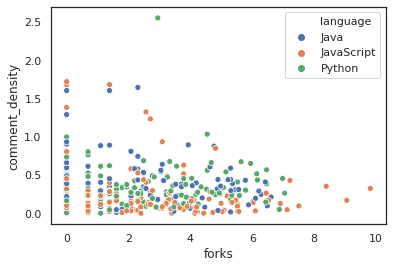

In [50]:
analyze_correlation(x=np.log1p(projects['forks']), y=projects['comment_density'], types=projects['language'])